<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/Final_Southern_Africa_Correlations_Food_Availability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
#importing libraries 
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [115]:
#importing data with pandas 
data_path = '/content/df_final_use.csv'
general_dfi = pd.read_csv(data_path, encoding ='latin-1', sep=';')
general_df = general_dfi.fillna(method='pad')
general_df.head()

,Country,Year,Food Availibility per capita (kg/cap/year),Production Quantity (Grains & Ce.+ Root Crops)(1000MT),Import Quantity (Grains & Ce.)(1000MT),Export Quantity (Grains & Ce.)(1000MT),Import Quantity (Root Crops)(1000MT),Export Quantity (Root Crops)(1000MT),Population (Million),Non-Cereal Food Aid (Grain Equiv. 1000MT),Cereal Food Aid (Grain Equiv. 1000MT),Imports (all)(1000MT),Exports (all)(1000MT),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Exports (all) per capita (kg/cap/year),Production + net ex-imports (kg/cap/year),Total Food Aid,Total Food Aid per capita (kg/cap/year),Region
0,Afghanistan,1980.0,NaN,3933.805,17.10,0.0,0.0,0.0,14186.000,NaN,NaN,17.10,0.0,277.301917,1.205414,0.0,278.507331,NaN,NaN,Central and East Asia
1,Afghanistan,1981.0,NaN,3763.130,96.50,0.0,0.0,0.0,13.984,NaN,NaN,96.50,0.0,269.102546,6.900744,0.0,276.003289,NaN,NaN,Central and East Asia
2,Afghanistan,1982.0,NaN,3602.788,74.90,0.0,0.0,0.0,13673.000,NaN,NaN,74.90,0.0,263.496526,5.477949,0.0,268.974475,NaN,NaN,Central and East Asia
3,Afghanistan,1983.0,NaN,3474.450,79503.00,0.0,0.0,0.0,13.300,NaN,NaN,79503.00,0.0,261.236842,5.977669,0.0,267.214511,NaN,NaN,Central and East Asia
4,Afghanistan,1984.0,NaN,3306.778,21.15,0.0,0.0,0.0,12932.000,NaN,NaN,21.15,0.0,255.705073,1.635478,0.0,257.340551,NaN,NaN,Central and East Asia


In [104]:
#creating a function to create scatter plots for each country showing the relationship between two variables  
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #adding a linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  #calculating the slope and y-intercept values 
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr

Zimbabwe
0.08163898693259493
146.94672633007977
0.25542282238664893
Zambia
0.16033917081936308
137.07494644990678
0.10204836994413177
Swaziland
0.03470185969108791
161.44528018150035
0.018553081340854743
Namibia
-0.009676152510288845
164.2146432896008
0.0003263472472401443
Mozambique
0.43221407527965217
108.64721957299331
0.3655845253308614
Malawi
0.1840789292301416
142.00037520568353
0.6345102721940177
Madagascar
0.18496954635035562
143.50370929295602
0.27880976905290983
Lesotho
0.42999363788626466
142.25507330036444
0.45678953928696375


,Production Quantity per capita (kg/cap/year),Food Availibility per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year),1.000000,0.675862
Food Availibility per capita (kg/cap/year),0.675862,1.000000


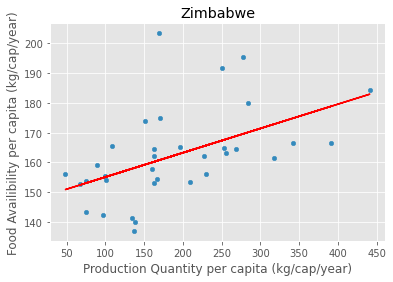

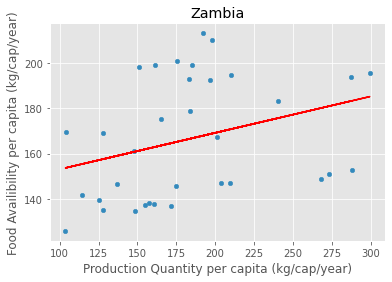

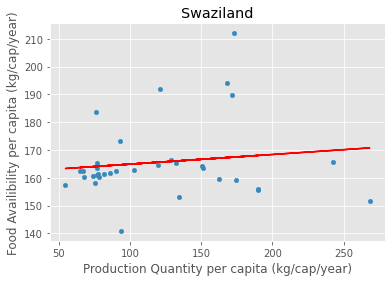

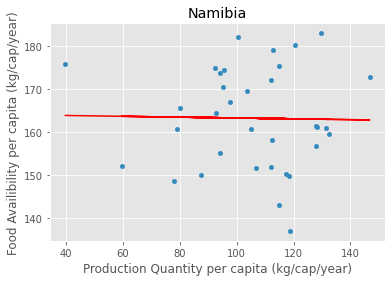

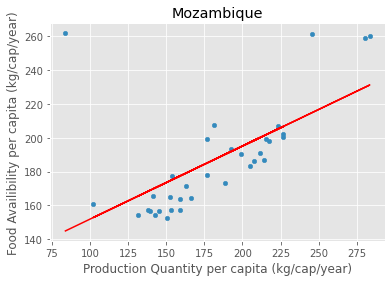

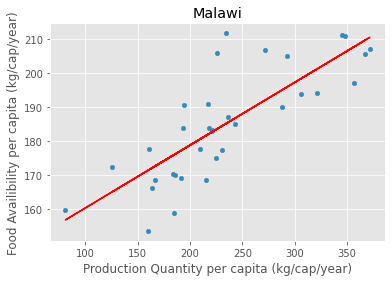

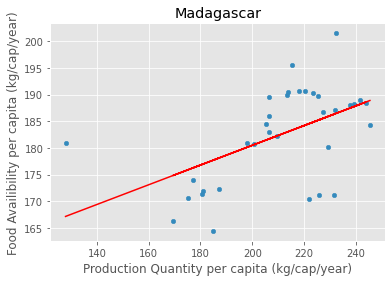

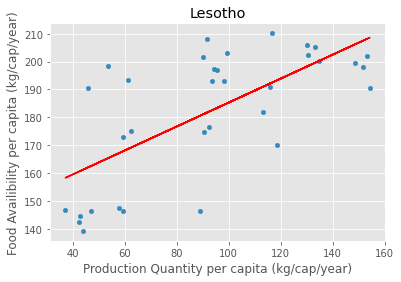

In [105]:
#calling the function for every country in Southern Africa, choosing food production per capita and food availibility per capita as the arguments
#this allows us to explore the relationship between food production per capita and food availability per capita 
plot_country('Zimbabwe','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Zambia','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Swaziland','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Namibia','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Mozambique','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Malawi','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Madagascar','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Lesotho','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')

In [106]:
#calculating the correlation coefficient between production per capita and food availability per capita 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Production Quantity per capita (kg/cap/year)'
feature2= 'Food Availibility per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                               Production Quantity per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                    0.505394
Food Availibility per capita (kg/cap/year)                                        0.505394                                    1.000000
Zambia                                               Production Quantity per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                       1.00000                                     0.31945
Food Availibility per capita (kg/cap/year)                                         0.31945                                     1.00000
Swaziland                                               Production Quantity per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Production Quantity per capit

Zimbabwe
-0.10634986719731553
166.38776355460507
0.06573576809897079
Zambia
0.38899505630863646
156.17552047591437
0.11369105301293456
Swaziland
-0.004910476247371472
166.07785617798808
9.096534177517922e-05
Namibia
0.2845988789584403
140.50343810952361
0.22917851072781056
Mozambique
0.2706514862266072
177.1833069299654
0.00813883451181585
Malawi
-0.3190266399843474
189.98322071570874
0.07187030262133833
Madagascar
-0.3728393815123296
188.75343678836643
0.09610848908673042
Lesotho
-0.15907878561372474
198.1137884331305
0.027188935820040065


,Imports (all) per capita (kg/cap/year),Food Availibility per capita (kg/cap/year)
Imports (all) per capita (kg/cap/year),1.000000,-0.164891
Food Availibility per capita (kg/cap/year),-0.164891,1.000000


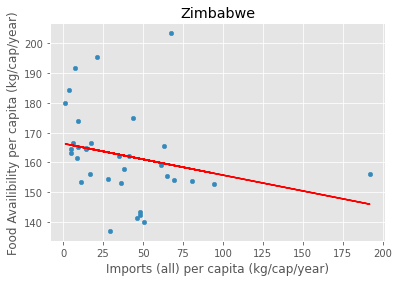

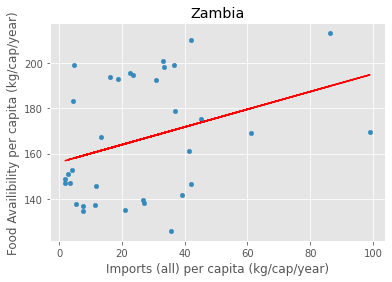

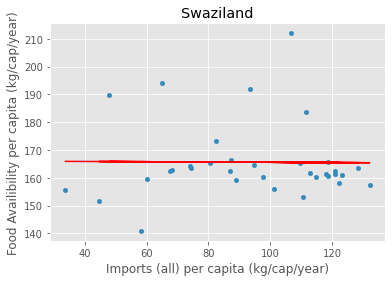

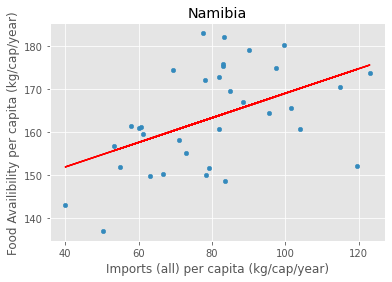

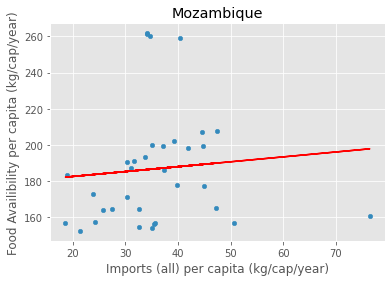

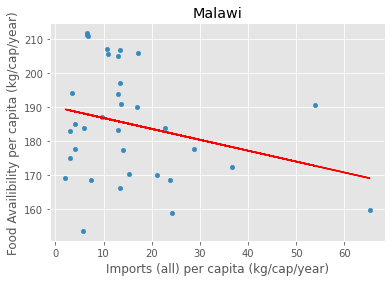

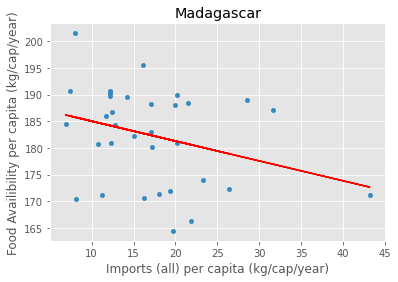

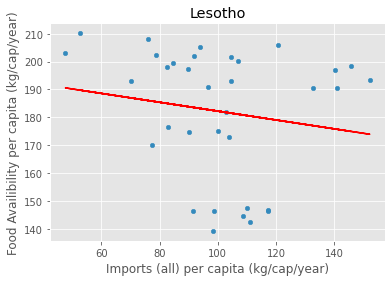

In [107]:
#calling the function for every country in Southern Africa, choosing food imports per capita and food availibility per capita as the arguments
#this allows us to explore the relationship between food imports per capita and food availability per capita 
plot_country('Zimbabwe','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Zambia','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Swaziland','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Namibia','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Mozambique','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Malawi','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Madagascar','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Lesotho','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')

In [108]:
#calculating the correlation coefficient between imports per capita and food availability per capita 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Imports (all) per capita (kg/cap/year)'
feature2= 'Food Availibility per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                             Imports (all) per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Imports (all) per capita (kg/cap/year)                                     1.00000                                    -0.25639
Food Availibility per capita (kg/cap/year)                                -0.25639                                     1.00000
Zambia                                             Imports (all) per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Imports (all) per capita (kg/cap/year)                                    1.000000                                    0.337181
Food Availibility per capita (kg/cap/year)                                0.337181                                    1.000000
Swaziland                                             Imports (all) per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Imports (all) per capita (kg/cap/year)                                    1.000000   

Zimbabwe
-0.14859097399262375
163.72445259956808
0.019988302329604163
Zambia
-0.024576758878605293
166.62828277304035
0.00015521568326690188
Swaziland
0.23661242102229127
163.23507972558278
0.020540167102814273
Namibia
-0.8182217492738049
166.98388142463122
0.1054119566630619
Mozambique
-0.5455313830840308
195.219708563086
0.1008981398523866
Malawi
-0.4992095801178109
191.30335498533591
0.16801963756171534
Madagascar
0.07848958223598305
181.90034876307482
0.0025579886947905243
Lesotho
0.6260346953525017
173.85913741662682
0.06778425345298825


,Total Food Aid per capita (kg/cap/year),Food Availibility per capita (kg/cap/year)
Total Food Aid per capita (kg/cap/year),1.000000,0.260354
Food Availibility per capita (kg/cap/year),0.260354,1.000000


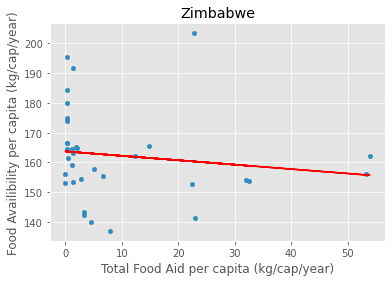

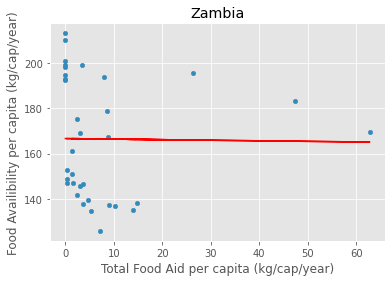

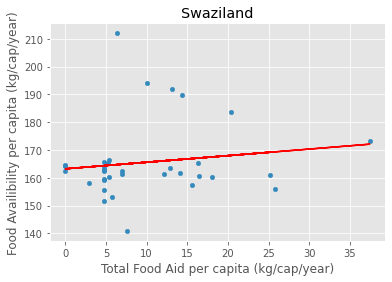

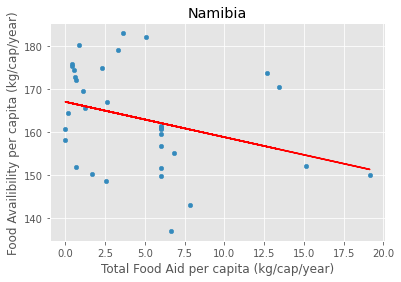

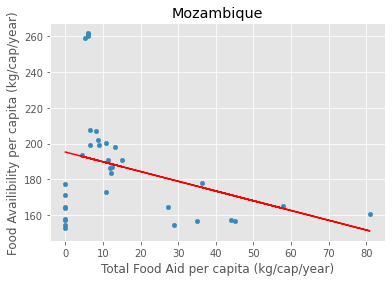

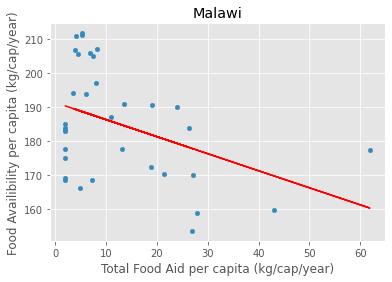

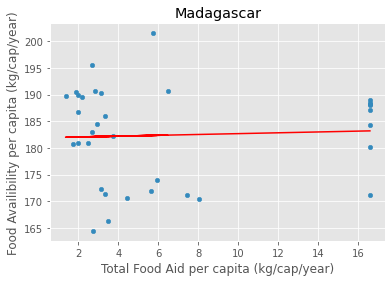

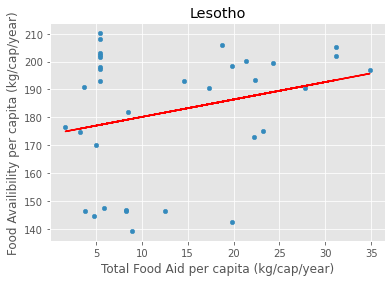

In [109]:
#calling the function for every country in Southern Africa, choosing food aid per capita and food availibility per capitaas the arguments
#this allows us to explore the relationship between food aid per capita and food availability per capita 
plot_country('Zimbabwe','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Zambia','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Swaziland','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Namibia','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Mozambique','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Malawi','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Madagascar','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Lesotho','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')

In [110]:
#calculating the correlation coefficient between food aid per capita and food availability per capita 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Total Food Aid per capita (kg/cap/year)'
feature2= 'Food Availibility per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                             Total Food Aid per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Total Food Aid per capita (kg/cap/year)                                     1.00000                                    -0.14138
Food Availibility per capita (kg/cap/year)                                 -0.14138                                     1.00000
Zambia                                             Total Food Aid per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Total Food Aid per capita (kg/cap/year)                                    1.000000                                   -0.012459
Food Availibility per capita (kg/cap/year)                                -0.012459                                    1.000000
Swaziland                                             Total Food Aid per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Total Food Aid per capita (kg/cap/year)                                    1.0

Zimbabwe
0.3740510065652236
156.97691361338227
0.21412486115476131
Zambia
-0.5611994263908494
172.10703001890207
0.09873202795089922
Swaziland
1.9680945750449172
159.92110659356095
0.27512142175766324
Namibia
0.20138009296583215
162.39102753580138
0.0138121325156264
Mozambique
5.154445829157161
172.11630366184315
0.2977497260371879
Malawi
0.6350658391439694
180.8136688496647
0.12442422804003624
Madagascar
2.2820501401546176
180.74662211324352
0.053945852638957396
Lesotho
3.6107141003419465
177.51648881487762
0.17421013101671903


,Exports (all) per capita (kg/cap/year),Food Availibility per capita (kg/cap/year)
Exports (all) per capita (kg/cap/year),1.000000,0.417385
Food Availibility per capita (kg/cap/year),0.417385,1.000000


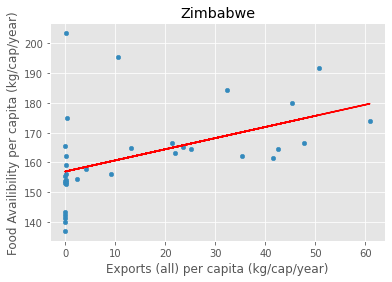

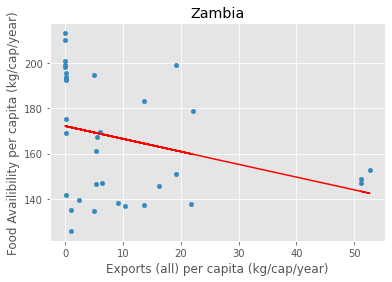

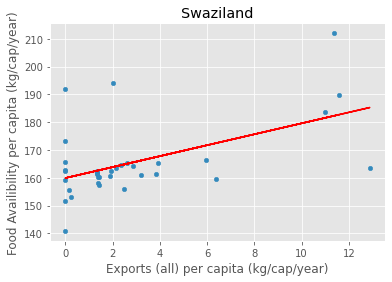

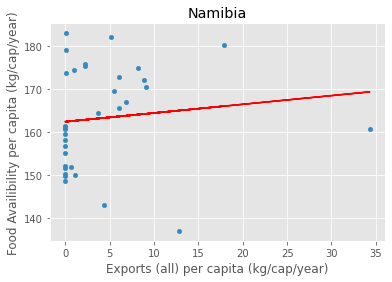

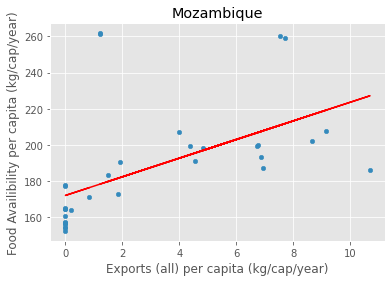

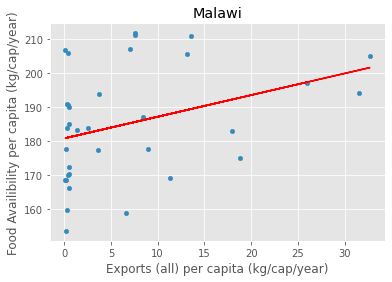

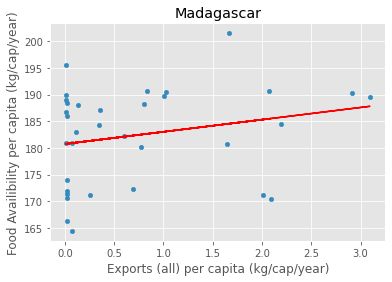

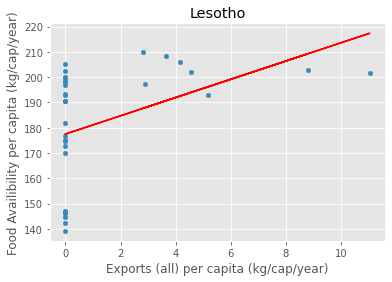

In [116]:
#calling the function for every country in Southern Africa, choosing food exports per capita and food availibility availability as the arguments
#this allows us to explore the relationship between food production per capita and food availability per capita 
plot_country('Zimbabwe','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Zambia','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Swaziland','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Namibia','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Mozambique','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Malawi','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Madagascar','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Lesotho','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')

In [112]:
#correlation coefficient - availability and export (all) 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Food Availibility per capita (kg/cap/year)'
feature2= 'Exports (all) per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                             Food Availibility per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Food Availibility per capita (kg/cap/year)                                    1.000000                                0.462736
Exports (all) per capita (kg/cap/year)                                        0.462736                                1.000000
Zambia                                             Food Availibility per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Food Availibility per capita (kg/cap/year)                                    1.000000                               -0.314217
Exports (all) per capita (kg/cap/year)                                       -0.314217                                1.000000
Swaziland                                             Food Availibility per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Food Availibility per capita (kg/cap/year)                                     1.0000